In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
test_df = pd.read_csv("loan_holdout.csv",low_memory=False)
train_df = pd.read_csv("loan_data.csv",low_memory=False)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
X1     338990 non-null object
X2     399999 non-null float64
X3     399999 non-null float64
X4     399999 non-null object
X5     399999 non-null object
X6     399999 non-null object
X7     399999 non-null object
X8     338730 non-null object
X9     338730 non-null object
X10    376014 non-null object
X11    382462 non-null object
X12    338639 non-null object
X13    338972 non-null float64
X14    399999 non-null object
X15    399999 non-null object
X16    123560 non-null object
X17    399999 non-null object
X18    399981 non-null object
X19    399999 non-null object
X20    399999 non-null object
X21    399999 non-null float64
X22    399999 non-null float64
X23    399999 non-null object
X24    399999 non-null float64
X25    181198 non-null float64
X26    51155 non-null float64
X27    399999 non-null float64
X28    399999 non-null float64
X29    399999 non-null float64
X30    39

In [4]:
train_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [5]:
train_df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
399995,12.99%,28753086.0,31226222.0,"$10,000","$10,000","$10,000",60 months,C,C1,Administrative Assistant,...,Nov-03,0.0,26.0,NaN,9.0,0.0,10268.0,76.10%,20.0,w
399996,16.29%,28753097.0,31226234.0,"$13,150","$13,150","$13,150",36 months,D,D2,helper,...,Oct-07,0.0,38.0,NaN,11.0,0.0,8931.0,37.80%,21.0,f
399997,10.99%,28753099.0,31226236.0,"$20,000","$20,000","$20,000",60 months,B,B3,Facility Administrator,...,Oct-04,0.0,63.0,NaN,14.0,0.0,28976.0,69.30%,48.0,w
399998,17.57%,28753118.0,31226256.0,"$18,475","$18,475","$18,475",60 months,D,D4,Senior Creative Designer/Ad Sales,...,Mar-94,0.0,NaN,NaN,19.0,0.0,11982.0,39%,31.0,f
399999,13.35%,28753146.0,31226285.0,"$16,000","$16,000","$16,000",36 months,C,C2,Electrician,...,Sep-10,0.0,NaN,NaN,9.0,0.0,3864.0,53.70%,12.0,f


In [6]:
#I didn't have time to handle the text/self-filled data. Some of these are unique values.

#A unique id assigned for the borrower.
train_df = train_df.drop(['X3'], axis=1)
test_df = test_df.drop(['X3'], axis=1)
#Employer or job title (self-filled)
train_df = train_df.drop(['X10'], axis=1)
test_df = test_df.drop(['X10'], axis=1)
#Reason for loan provided by borrower
train_df = train_df.drop(['X16'], axis=1)
test_df = test_df.drop(['X16'], axis=1)
#Loan title, as provided by borrower
train_df = train_df.drop(['X18'], axis=1)
test_df = test_df.drop(['X18'], axis=1)

In [7]:
total = train_df.isnull().sum()
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 2))
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
X1,61010,15.25
X2,1,0.00
X4,1,0.00
X5,1,0.00
X6,1,0.00
X7,1,0.00
X8,61270,15.32
X9,61270,15.32
X11,17538,4.38
X12,61361,15.34


In [8]:
train_df.shape

(400000, 28)

In [9]:
#drop missing Interest Rate on the loan
train_df = train_df.dropna(subset=['X1'])
train_df.shape

(338990, 28)

In [10]:
data = [train_df, test_df]

for dataset in data:
    dataset['X1'] = dataset['X1'].astype(str)
    dataset['X1'] = dataset['X1'].replace({'%': ''}, regex=True)
    dataset['X1'] = dataset['X1'].astype(np.float32)

train_df['X1'].head()

0    11.89
1    10.71
2    16.99
3    13.11
4    13.57
Name: X1, dtype: float32

In [11]:
data = [train_df, test_df]

for dataset in data:
    dataset['X4'] = dataset['X4'].replace({'\$': '', ',': ''}, regex=True)
    dataset['X5'] = dataset['X5'].replace({'\$': '', ',': ''}, regex=True)
    dataset['X6'] = dataset['X6'].replace({'\$': '', ',': ''}, regex=True)

train_df[['X4','X5','X6']].head()

,X4,X5,X6
0,25000,25000,19080
1,7000,7000,673
2,25000,25000,24725
3,1200,1200,1200
4,10800,10800,10692


In [12]:
train_df = train_df.dropna(subset=['X4'])
test_df = test_df.dropna(subset=['X4'])

data = [train_df, test_df]

for dataset in data:
    dataset['X4'] = dataset['X4'].astype(int)
    dataset['X5'] = dataset['X5'].astype(int)
    dataset['X6'] = dataset['X6'].astype(int)

In [13]:
#looks like I took care of that missing value
total = train_df.isnull().sum()
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 2))
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
X1,0,0.00
X2,0,0.00
X4,0,0.00
X5,0,0.00
X6,0,0.00
X7,0,0.00
X8,51866,15.30
X9,51866,15.30
X11,14794,4.36
X12,51959,15.33


In [14]:
#omg there are so many objects
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 28 columns):
X1     338989 non-null float32
X2     338989 non-null float64
X4     338989 non-null int32
X5     338989 non-null int32
X6     338989 non-null int32
X7     338989 non-null object
X8     287123 non-null object
X9     287123 non-null object
X11    324195 non-null object
X12    287030 non-null object
X13    287238 non-null float64
X14    338989 non-null object
X15    338989 non-null object
X17    338989 non-null object
X19    338989 non-null object
X20    338989 non-null object
X21    338989 non-null float64
X22    338989 non-null float64
X23    338989 non-null object
X24    338989 non-null float64
X25    153533 non-null float64
X26    43400 non-null float64
X27    338989 non-null float64
X28    338989 non-null float64
X29    338989 non-null float64
X30    338765 non-null object
X31    338989 non-null float64
X32    338989 non-null object
dtypes: float32(1), float64(11), int32(3)

In [15]:
#convert to numeric
duration = {" 36 months": 0, " 60 months": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['X7'] = dataset['X7'].map(duration)
    
train_df[['X7']].head()

,X7
0,0
1,0
2,0
3,0
4,0


In [16]:
#convert to numeric
grade = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
data = [train_df, test_df]

for dataset in data:
    dataset['X8'] = dataset['X8'].map(grade)
    dataset['X8'] = dataset['X8'].fillna(0)
    dataset['X8'] = dataset['X8'].astype(int)
    
train_df[['X8']].head()

,X8
0,2
1,2
2,4
3,3
4,3


In [17]:
data = [train_df, test_df]

for dataset in data:
    dataset['X9'] = dataset['X9'].astype(str)
    dataset['X9'] = dataset['X9'].str.extract('(\d+)')
    dataset['X9'] = dataset['X9'].fillna(0)
    dataset['X9'] = dataset['X9'].astype(int)

train_df['X9'].head()

0    4
1    5
2    3
3    2
4    3
Name: X9, dtype: int32

In [18]:
#Number of years employed (0 to 10; 10 = 10 or more)
data = [train_df, test_df]

for dataset in data:
    dataset['X11'] = dataset['X11'].astype(str)
    dataset['X11'] = dataset['X11'].str.extract('(\d+)')
    dataset['X11'] = dataset['X11'].fillna(0)
    dataset['X11'] = dataset['X11'].astype(int)

train_df['X11'].head()

0     1
1     1
2     1
3    10
4     6
Name: X11, dtype: int32

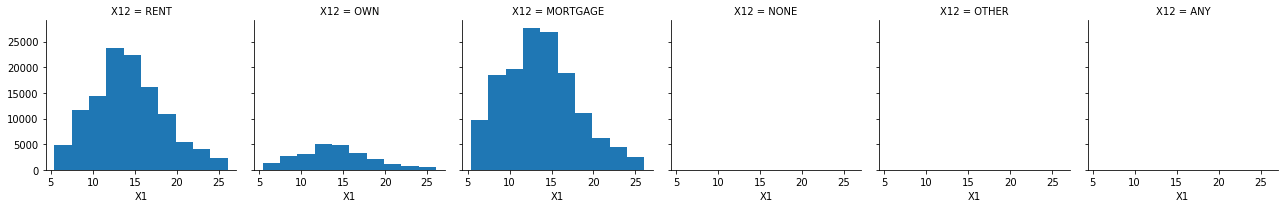

In [19]:
plot1 = sns.FacetGrid(train_df, col='X12')
plot1.map(plt.hist, 'X1', bins=10)

In [20]:
#Home ownership status: RENT, OWN, MORTGAGE, OTHER.
#convert to numeric
ownership = {"ANY": 0, "NONE": 0, "OTHER": 0, "RENT": 1, "MORTGAGE": 2, "OWN": 3}
data = [train_df, test_df]

for dataset in data:
    dataset['X12'] = dataset['X12'].map(ownership)
    dataset['X12'] = dataset['X12'].fillna(0)
    dataset['X12'] = dataset['X12'].astype(int)
    
train_df[['X12']].head()

,X12
0,1
1,1
2,1
3,3
4,1


In [21]:
train_df[['X13']].head()

,X13
0,85000.0
1,65000.0
2,70000.0
3,54000.0
4,32000.0


In [22]:
train_df[['X13']].describe()

,X13
count,2.872380e+05
mean,7.315146e+04
std,5.618967e+04
min,3.000000e+03
25%,4.500000e+04
50%,6.300000e+04
75%,8.807875e+04
max,7.500000e+06


In [23]:
combine = train_df['X13'].append(test_df['X13'])

combine.mean()

73593.45558291876

In [24]:
data = [train_df, test_df]

for dataset in data: 
    dataset['X13'] = dataset['X13'].fillna(73593)
    dataset['X13'] = dataset['X13'].astype(int)

train_df[['X13']].head()

,X13
0,85000
1,65000
2,70000
3,54000
4,32000


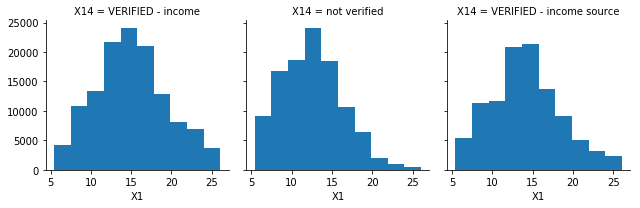

In [25]:
plot2 = sns.FacetGrid(train_df, col='X14')
plot2.map(plt.hist, 'X1', bins=10)

In [26]:
#Home ownership status: RENT, OWN, MORTGAGE, OTHER.
#convert to numeric
verified = {"not verified": 0, "VERIFIED - income": 1, "VERIFIED - income source": 3}
data = [train_df, test_df]

for dataset in data:
    dataset['X14'] = dataset['X14'].map(verified)
    dataset['X14'] = dataset['X14'].fillna(0)
    dataset['X14'] = dataset['X14'].astype(int)
    
train_df[['X14']].head()

,X14
0,1
1,0
2,1
3,0
4,0


In [27]:
train_df[['X15']].head()

,X15
0,Aug-09
1,May-08
2,Aug-14
3,Mar-10
4,Nov-09


In [28]:
#import re
#dataset['X15'] = re.sub('[^a-zA-Z]+', '',  str(dataset['X15']))

month = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}

data = [train_df, test_df]

for dataset in data:

    dataset['X15'] = dataset['X15'].astype(str)
    dataset['X15'] = dataset['X15'].str[:3]
    dataset['X15'] = dataset['X15'].map(month)
    dataset['X15'] = dataset['X15'].fillna(0)

test_df[['X15']].head()

,X15
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data = [train_df, test_df]

for dataset in data:

    dataset['X17'] = labelencoder.fit_transform(dataset['X17'])
    dataset['X17'] = dataset['X17'].astype(int)

train_df[['X17']].head()

,X17
0,2
1,1
2,2
3,2
4,2


In [30]:
train_df[['X19']].describe()

,X19
count,338989
unique,874
top,945xx
freq,3922


In [31]:
#too many unique to be of value
train_df = train_df.drop(['X19'], axis=1)
test_df = test_df.drop(['X19'], axis=1)

In [32]:
train_df[['X20']].describe()

,X20
count,338989
unique,50
top,CA
freq,52835


In [33]:
#too many unique to be of value
train_df = train_df.drop(['X20'], axis=1)
test_df = test_df.drop(['X20'], axis=1)

In [34]:
data = [train_df, test_df]

for dataset in data:
    dataset['X23'] = dataset['X23'].astype(str)
    dataset['X23'] = dataset['X23'].str.extract('(\d+)')
    dataset['X23'] = dataset['X23'].astype(int)

train_df[['X23']].head()

,X23
0,94
1,0
2,0
3,85
4,96


In [35]:
combine = train_df['X25'].append(test_df['X25'])

combine.describe()

count    194829.000000
mean         34.201803
std          21.796499
min           0.000000
25%          16.000000
50%          31.000000
75%          50.000000
max         188.000000
Name: X25, dtype: float64

In [36]:
#Number of months since the borrower's last delinquency.

data = [train_df, test_df]

for dataset in data: 
    dataset['X25'] = dataset['X25'].fillna(34)
    dataset['X25'] = dataset['X25'].astype(int)

train_df[['X25']].head()

,X25
0,34
1,34
2,41
3,64
4,58


In [37]:
combine = train_df['X26'].append(test_df['X26'])

combine.describe()

count    57239.000000
mean        74.197418
std         29.588964
min          0.000000
25%         53.000000
50%         75.000000
75%        101.000000
max        129.000000
Name: X26, dtype: float64

In [38]:
data = [train_df, test_df]

for dataset in data: 
    dataset['X26'] = dataset['X26'].fillna(74)
    dataset['X26'] = dataset['X26'].astype(int)

train_df[['X26']].head()

,X26
0,74
1,74
2,74
3,74
4,74


In [39]:
train_df[['X29']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 1 columns):
X29    338989 non-null float64
dtypes: float64(1)
memory usage: 5.2 MB


In [40]:
data = [train_df, test_df]

for dataset in data:
    dataset['X30'] = dataset['X30'].astype(str)
    dataset['X30'] = dataset['X30'].replace({'%': ''}, regex=True)
    dataset['X30'] = dataset['X30'].astype(np.float32)
    dataset['X30'] = dataset['X30'].fillna(57.6)

train_df['X30'].head()

0    52.099998
1    76.699997
2    66.300003
3    40.400002
4    25.600000
Name: X30, dtype: float32

In [41]:
train_df['X32'].describe()

count     338989
unique         2
top            f
freq      232600
Name: X32, dtype: object

In [42]:
status = {"f": 0, "w": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['X32'] = dataset['X32'].fillna('f')
    dataset['X32'] = dataset['X32'].map(status)
    dataset['X32'] = dataset['X32'].astype(int)
    
train_df[['X32']].head()

,X32
0,0
1,0
2,0
3,0
4,0


In [43]:
total = train_df.isnull().sum()
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 2))
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
X1,0,0.0
X2,0,0.0
X4,0,0.0
X5,0,0.0
X6,0,0.0
X7,0,0.0
X8,0,0.0
X9,0,0.0
X11,0,0.0
X12,0,0.0


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 26 columns):
X1     338989 non-null float32
X2     338989 non-null float64
X4     338989 non-null int32
X5     338989 non-null int32
X6     338989 non-null int32
X7     338989 non-null int64
X8     338989 non-null int32
X9     338989 non-null int32
X11    338989 non-null int32
X12    338989 non-null int32
X13    338989 non-null int32
X14    338989 non-null int32
X15    338989 non-null int64
X17    338989 non-null int32
X21    338989 non-null float64
X22    338989 non-null float64
X23    338989 non-null int32
X24    338989 non-null float64
X25    338989 non-null int32
X26    338989 non-null int32
X27    338989 non-null float64
X28    338989 non-null float64
X29    338989 non-null float64
X30    338989 non-null float32
X31    338989 non-null float64
X32    338989 non-null int32
dtypes: float32(2), float64(8), int32(14), int64(2)
memory usage: 49.1 MB


In [45]:
data = [train_df, test_df]

for dataset in data:
    dataset['X1'] = dataset['X1'].astype(np.float32)
    dataset['X1'] = round(dataset['X1'],4)
    dataset['X2'] = dataset['X2'].astype(np.float32)
    dataset['X2'] = round(dataset['X2'],4)
    dataset['X15'] = dataset['X15'].astype(np.float32)
    dataset['X15'] = round(dataset['X15'],4)
    dataset['X21'] = dataset['X21'].astype(np.float32)
    dataset['X21'] = round(dataset['X21'],4)
    dataset['X22'] = dataset['X22'].astype(np.float32)
    dataset['X22'] = round(dataset['X22'],4)
    dataset['X24'] = dataset['X24'].astype(np.float32)
    dataset['X24'] = round(dataset['X24'],4)
    dataset['X27'] = dataset['X27'].astype(np.float32)
    dataset['X27'] = round(dataset['X27'],4)
    dataset['X28'] = dataset['X28'].astype(np.float32)
    dataset['X28'] = round(dataset['X28'],4)
    dataset['X29'] = dataset['X29'].astype(np.float32)
    dataset['X29'] = round(dataset['X29'],4)
    dataset['X31'] = dataset['X31'].astype(np.float32)
    dataset['X31'] = round(dataset['X31'],4)
    
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 26 columns):
X1     0 non-null float32
X2     80000 non-null float32
X4     80000 non-null int32
X5     80000 non-null int32
X6     80000 non-null int32
X7     80000 non-null int64
X8     80000 non-null int32
X9     80000 non-null int32
X11    80000 non-null int32
X12    80000 non-null int32
X13    80000 non-null int32
X14    80000 non-null int32
X15    80000 non-null float32
X17    80000 non-null int32
X21    80000 non-null float32
X22    80000 non-null float32
X23    80000 non-null int32
X24    80000 non-null float32
X25    80000 non-null int32
X26    80000 non-null int32
X27    80000 non-null float32
X28    80000 non-null float32
X29    80000 non-null float32
X30    80000 non-null float32
X31    80000 non-null float32
X32    80000 non-null int32
dtypes: float32(11), int32(14), int64(1)
memory usage: 8.9 MB


In [46]:
#X1 - interest rate of loan
#X2 - loan ID

X_train = train_df.drop("X1", axis=1)
Y_train = train_df["X1"]
X_test  = test_df.drop(['X1'], axis=1).copy()

In [47]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [48]:
#LinearRegression
linreg = LinearRegression()
lin_model = linreg.fit(X_train, Y_train)

lin_Y_pred = linreg.predict(X_test)

acc_lin = round(linreg.score(X_train, Y_train) * 100, 2)

acc_lin

63.23

In [49]:
#RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=10)
random_forest_model = random_forest.fit(X_train, Y_train)

random_Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.68

In [50]:
#DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(min_samples_leaf=5) 
decision_tree_model = decision_tree.fit(X_train, Y_train)  
decision_tree_Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.3

In [51]:
#Bagging DT
from sklearn.ensemble import BaggingRegressor

decision_tree = DecisionTreeRegressor(min_samples_leaf=5)  
bc = BaggingRegressor(base_estimator=decision_tree, n_estimators=5,
n_jobs=-1)
bagging_model = bc.fit(X_train, Y_train)

bagging_Y_pred = bc.predict(X_test)

acc_bagging = round(bc.score(X_train, Y_train) * 100, 2)
acc_bagging

96.62

In [52]:
from sklearn.ensemble import AdaBoostRegressor

#Boosting DT
ada = AdaBoostRegressor(base_estimator=decision_tree, n_estimators=5, random_state=1)

ada_model = ada.fit(X_train, Y_train)

ada_Y_pred = ada.predict(X_test)

acc_ada = round(ada.score(X_train, Y_train) * 100, 2)
acc_ada

99.47

In [53]:
#rom sklearn.preprocessing import StandardScaler

#s = StandardScaler()
#caledX_train = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
#caledX_test = pd.DataFrame(ss.fit_transform(X_test),columns = X_test.columns)

C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype float32, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype float32, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
#scaledY_train = ss.fit_transform(Y_train.values.reshape(-1, 1))
#my_list = map(lambda x: x[0], scaledY_train)
#scaledY_train = pd.Series(my_list)

In [55]:
#Support Vector Machine
#I couldn't get SVR to run in a resonable amount of time w or w/o bagging.

#from sklearn.ensemble import BaggingRegressor

#svr = SVR(gamma='auto') 
#bc = BaggingRegressor(base_estimator=svr, n_estimators=5,
#n_jobs=-1)
#bagging_model = bc.fit(scaledX_train, scaledY_train)

#bagging_Y_pred = bc.predict(scaledX_test)

#acc_bagging = round(bc.score(scaledX_train, scaledY_train) * 100, 2)

In [56]:
#Took too long to run.
#KNeighbors
#knn = KNeighborsRegressor(n_neighbors=3, n_jobs=-1) 
#knn_model = knn.fit(scaledX_train, scaledY_train)  
#knn_Y_pred = knn.predict(scaledX_test)  

#acc_knn = round(knn.score(scaledX_train, scaledY_train) * 100, 2)
#acc_knn

In [59]:
results = pd.DataFrame({
    'Model': ['LinearRegression', 'RandomForestClassifier', 'DecisionTreeClassifier',
             'DT Bagging','DT Boosting'],
    'Score': [acc_lin,acc_random_forest,acc_decision_tree,acc_bagging,acc_ada]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
99.47,DT Boosting
98.68,RandomForestClassifier
97.30,DecisionTreeClassifier
96.62,DT Bagging
63.23,LinearRegression


In [60]:
#lower is better
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest, X_train, Y_train, cv=5, scoring = "neg_mean_squared_error")
print("Scores:", scores)
print("Mean:", scores.mean())
print("SD:", scores.std())

Scores: [-4.17418567 -1.76906279 -1.91618167 -1.73855291 -1.96943949]
Mean: -2.3134845058278772
SD: 0.9343839338361681


In [61]:
scores = cross_val_score(decision_tree, X_train, Y_train, cv=5, scoring = "neg_mean_squared_error")
print("Scores:", scores)
print("Mean:", scores.mean())
print("SD:", scores.std())

Scores: [-4.66675848 -2.5382159  -2.60586895 -2.61564474 -2.50140851]
Mean: -2.985579316229228
SD: 0.8416591149346492


In [62]:
scores = cross_val_score(ada, X_train, Y_train, cv=5, scoring = "neg_mean_squared_error")
print("Scores:", scores)
print("Mean:", scores.mean())
print("SD:", scores.std())

Scores: [-4.52365412 -1.98136602 -2.1297949  -1.92068119 -2.08295337]
Mean: -2.5276899194020586
SD: 1.0006911127487073


In [71]:
MSE_CV_scores1 = - cross_val_score(random_forest, X_train, Y_train, cv=5, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV1 = (MSE_CV_scores1.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV1))

CV RMSE: 1.54


In [74]:
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
random_forest.fit(X_train, Y_train)

# Predict the labels of the training set
y_pred_train1 = random_forest.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train1 = (MSE(Y_train, y_pred_train1))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train1))

Train RMSE: 0.50


In [ ]:
#cross-validation performance and training performance should be close
#If your validation error is high but training error is low, you have overfitting (variance) - THIS
#If your validation error and training error are both high, you have underfitting (bias)

In [85]:
from sklearn.model_selection import GridSearchCV

rf=RandomForestRegressor(random_state=42)

param_grid = { 
    'n_estimators': [10, 20, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['mse']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rf.fit(X_train, Y_train)

CV_rf.best_params_

#{'criterion': 'mse',
# 'max_depth': 7,
# 'max_features': 'auto',
# 'n_estimators': 50}

#I ran this several times but ran into processing limitations. It appears that increasing the depth/n-estimators helps.

{'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 50}

In [129]:
CV_rf.best_score_

0.8572676927051401

In [86]:
random_forest=RandomForestRegressor(random_state=42, criterion='mse', max_depth=7, max_features='auto', n_estimators=50)

MSE_CV_scores1 = - cross_val_score(random_forest, X_train, Y_train, cv=5, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

RMSE_CV1 = (MSE_CV_scores1.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV1))

CV RMSE: 1.62


In [87]:
# Fit dt to the training set
random_forest.fit(X_train, Y_train)

# Predict the labels of the training set
y_pred_train1 = random_forest.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train1 = (MSE(Y_train, y_pred_train1))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train1))

Train RMSE: 1.41


In [88]:
#Increasing n_estimators did not change RMSE this time.
random_forest=RandomForestRegressor(random_state=42, criterion='mse', max_depth=7, max_features='auto', n_estimators=100)

MSE_CV_scores2 = - cross_val_score(random_forest, X_train, Y_train, cv=5, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

RMSE_CV2 = (MSE_CV_scores2.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV1))

CV RMSE: 1.62


In [89]:
# Fit dt to the training set
random_forest.fit(X_train, Y_train)

# Predict the labels of the training set
y_pred_train2 = random_forest.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train2 = (MSE(Y_train, y_pred_train1))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train2))

Train RMSE: 1.41


In [130]:
#final model
#RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42, criterion='mse', max_depth=7, max_features='auto', n_estimators=50)
final_rf_model = random_forest.fit(X_train, Y_train)

final_random_Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
final_acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
final_acc_random_forest

89.63

EXPLANTION

My final Random Forest model has lower accuracy than my original. However, I feel like it is less prone to overfit considering the RSMEs of CV and Train. All of the tree models peformed better than Linear Regressison. Random Forest outperforms LR when relationships are not truly linear (which could be the case for some features). Random Forests fit data better from the get-go without transformations. I didn't remove outliers from the data and RF is more tolerant of outliers than LR. There are methods I could have used to tune the LR model but, based on the inital accuracy, I don't think I could have improved it enough to match that of Random Forest.

In [136]:
final_results = pd.read_csv("loan_holdout.csv")
final_results['X1'] = final_random_Y_pred
final_results.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,14.990000,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,5.997592,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,13.349668,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,15.609678,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,9.169606,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [138]:
final_results = final_results.iloc[:,0:2]
final_results.head(10)

,X1,X2
0,14.990000,44409194
1,5.997592,44017917
2,13.349668,44259158
3,15.609678,44429213
4,9.169606,44299188
5,10.989846,44057008
6,13.979902,41399898
7,10.148139,43801789
8,14.488725,44409120
9,6.544837,44319155


In [139]:
final_results.to_csv('Loan Results from Sasha Roberts.csv', index=False, header=True)